Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.74      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.87      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest - Mean: 0.8544, Std Dev: 0.0145, Standard Error: 0.0103
Decision Tree - Mean: 0.5730, Std Dev: 0.1303, Standard Error: 0.0922


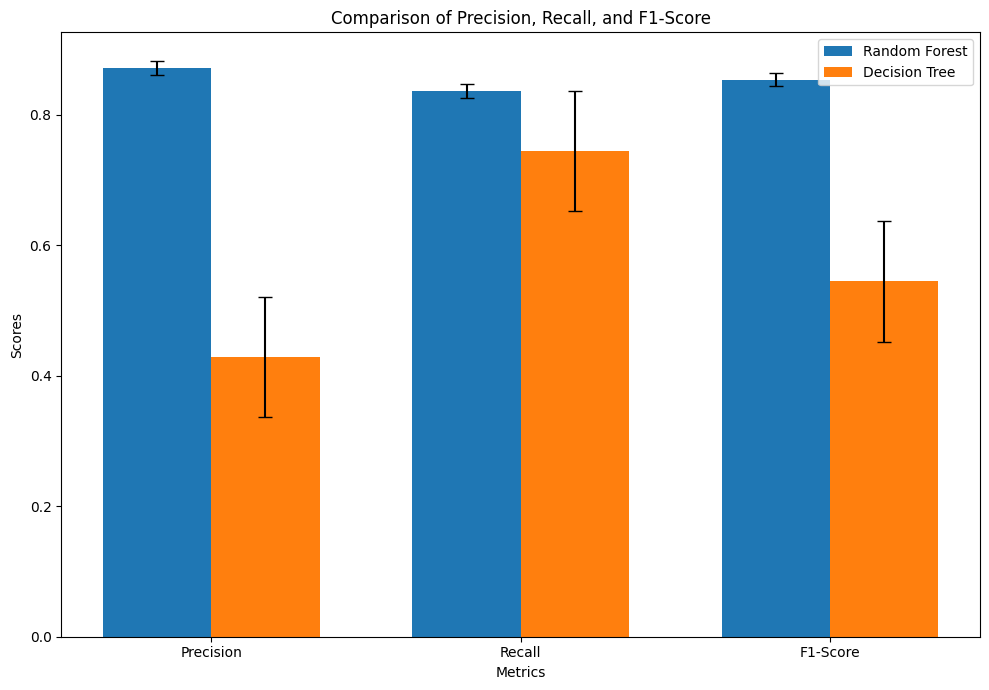

Random Forest Accuracy: 99.95%
Decision Tree Accuracy: 99.79%

Explanation:
1. Random Forest handles imbalanced data more effectively by creating an ensemble of trees, reducing the bias towards the majority class.
2. The use of SMOTE in conjunction with Random Forest helps balance the class distribution, improving recall for the minority class.
3. Random Forest's ability to aggregate results across multiple trees provides a more robust detection of fraudulent transactions.
4. The results demonstrate that Random Forest achieves higher precision and recall, indicating its superiority in detecting fraud compared to a single Decision Tree.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem  # for standard error calculation

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_predictions = rf_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
dt_predictions = dt_model.predict(X_test)

# Evaluation for Random Forest
rf_class_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluation for Decision Tree
dt_class_report = classification_report(y_test, dt_predictions, output_dict=True)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Bar graph comparison for Precision, Recall, and F1-Score
labels = ['Precision', 'Recall', 'F1-Score']
rf_scores = [rf_class_report['1'][metric.lower()] for metric in labels]
dt_scores = [dt_class_report['1'][metric.lower()] for metric in labels]

# Calculating mean, standard deviation, and standard error
rf_mean = np.mean(rf_scores)
dt_mean = np.mean(dt_scores)

rf_std = np.std(rf_scores)
dt_std = np.std(dt_scores)

rf_se = sem(rf_scores)
dt_se = sem(dt_scores)

# Printing the calculated statistics
print(f"Random Forest - Mean: {rf_mean:.4f}, Std Dev: {rf_std:.4f}, Standard Error: {rf_se:.4f}")
print(f"Decision Tree - Mean: {dt_mean:.4f}, Std Dev: {dt_std:.4f}, Standard Error: {dt_se:.4f}")

# Bar graph plotting
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree')

# Adding error bars to the bars
ax.errorbar(x - width/2, rf_scores, yerr=rf_se, fmt='none', capsize=5, color='black')
ax.errorbar(x + width/2, dt_scores, yerr=dt_se, fmt='none', capsize=5, color='black')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

# Print accuracy comparison
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

# Explanation of how Random Forest handles imbalanced data
print("\nExplanation:")
print("1. Random Forest handles imbalanced data more effectively by creating an ensemble of trees, reducing the bias towards the majority class.")
print("2. The use of SMOTE in conjunction with Random Forest helps balance the class distribution, improving recall for the minority class.")
print("3. Random Forest's ability to aggregate results across multiple trees provides a more robust detection of fraudulent transactions.")
print("4. The results demonstrate that Random Forest achieves higher precision and recall, indicating its superiority in detecting fraud compared to a single Decision Tree.")




First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

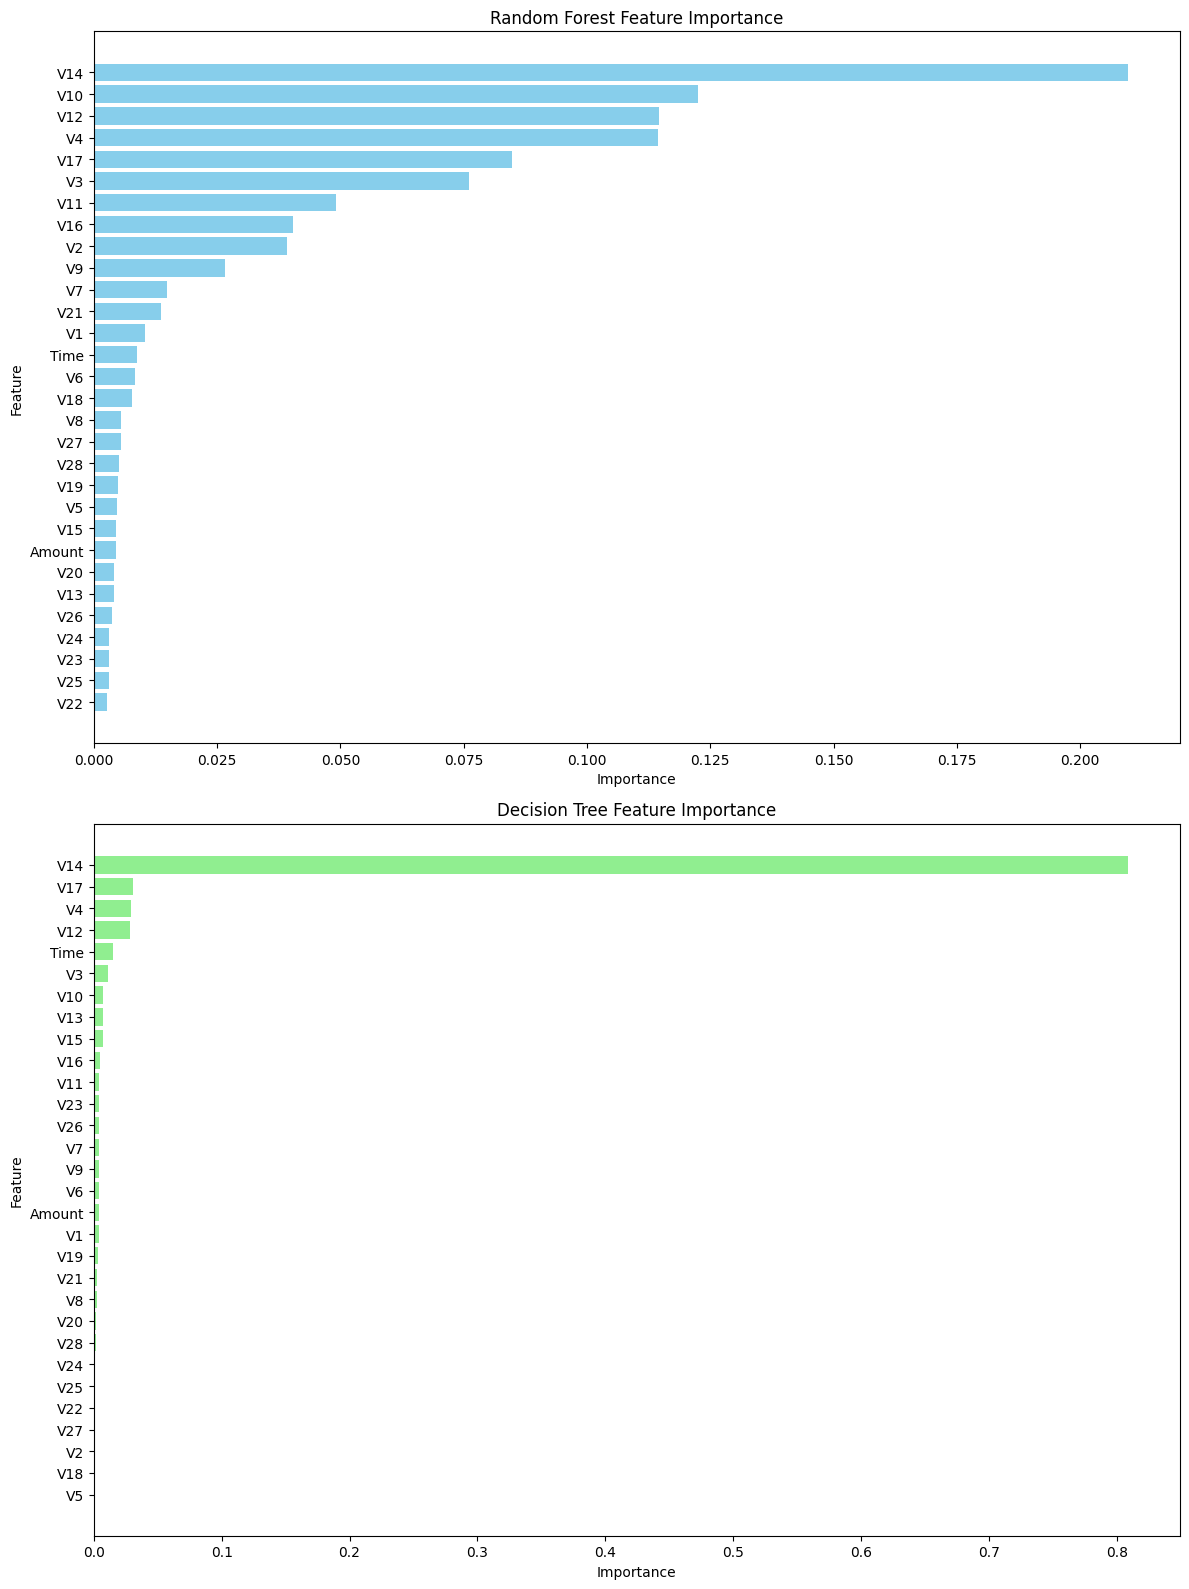

Top 10 Most Important Features for Random Forest:
   Feature  Importance
14     V14    0.209751
10     V10    0.122500
12     V12    0.114641
4       V4    0.114446
17     V17    0.084885
3       V3    0.076123
11     V11    0.049184
16     V16    0.040387
2       V2    0.039112
9       V9    0.026598

Top 10 Most Important Features for Decision Tree:
   Feature  Importance
14     V14    0.808883
17     V17    0.030754
4       V4    0.029409
12     V12    0.027995
0     Time    0.014664
3       V3    0.011051
10     V10    0.007485
13     V13    0.007422
15     V15    0.006841
16     V16    0.005249


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_predictions = rf_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
dt_predictions = dt_model.predict(X_test)

# Evaluation for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluation for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Extract Feature Importance for Random Forest
rf_feature_importances = rf_model.feature_importances_

# Extract Feature Importance for Decision Tree
dt_feature_importances = dt_model.feature_importances_

# Create DataFrames for better visualization
feature_names = data.columns[:-1]  # Exclude the target variable 'Class'

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances for both models
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

# Random Forest Feature Importance
ax[0].barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
ax[0].set_xlabel('Importance')
ax[0].set_ylabel('Feature')
ax[0].set_title('Random Forest Feature Importance')
ax[0].invert_yaxis()

# Decision Tree Feature Importance
ax[1].barh(dt_importance_df['Feature'], dt_importance_df['Importance'], color='lightgreen')
ax[1].set_xlabel('Importance')
ax[1].set_ylabel('Feature')
ax[1].set_title('Decision Tree Feature Importance')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print the most important features for both models
print("Top 10 Most Important Features for Random Forest:")
print(rf_importance_df.head(10))
print("\nTop 10 Most Important Features for Decision Tree:")
print(dt_importance_df.head(10))



Random Forest with 10 Trees:
Training Accuracy: 100.00%
Test Accuracy: 99.95%
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest with 50 Trees:
Training Accuracy: 100.00%
Test Accuracy: 99.95%
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.

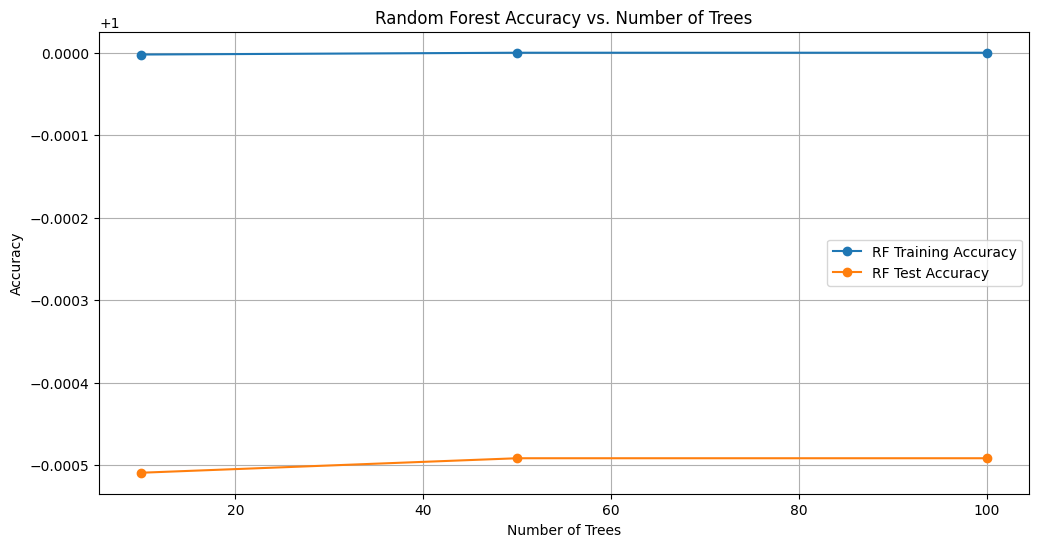

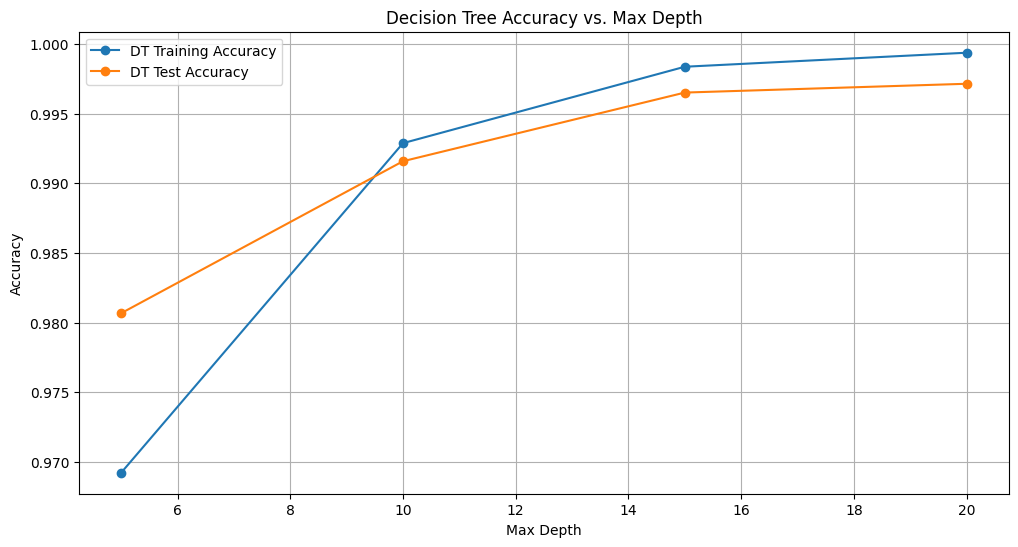

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Define the number of trees to test for Random Forest
n_trees = [10, 50, 100]

# Initialize dictionaries to store performance metrics for Random Forest
rf_train_accuracies = {}
rf_test_accuracies = {}
rf_train_class_reports = {}
rf_test_class_reports = {}

for n in n_trees:
    # Train Random Forest model with varying number of trees
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_res, y_train_res)
    
    # Predictions
    rf_train_predictions = rf_model.predict(X_train_res)
    rf_test_predictions = rf_model.predict(X_test)
    
    # Evaluation for training data
    rf_train_accuracy = accuracy_score(y_train_res, rf_train_predictions)
    rf_train_class_report = classification_report(y_train_res, rf_train_predictions, output_dict=True)
    
    # Evaluation for test data
    rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
    rf_test_class_report = classification_report(y_test, rf_test_predictions, output_dict=True)
    
    # Store metrics
    rf_train_accuracies[n] = rf_train_accuracy
    rf_test_accuracies[n] = rf_test_accuracy
    rf_train_class_reports[n] = rf_train_class_report
    rf_test_class_reports[n] = rf_test_class_report

# Train Decision Tree model with different maximum depths
depths = [5, 10, 15, 20]
dt_train_accuracies = {}
dt_test_accuracies = {}
dt_train_class_reports = {}
dt_test_class_reports = {}

for depth in depths:
    # Train Decision Tree model with varying depth
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_res, y_train_res)
    
    # Predictions
    dt_train_predictions = dt_model.predict(X_train_res)
    dt_test_predictions = dt_model.predict(X_test)
    
    # Evaluation for training data
    dt_train_accuracy = accuracy_score(y_train_res, dt_train_predictions)
    dt_train_class_report = classification_report(y_train_res, dt_train_predictions, output_dict=True)
    
    # Evaluation for test data
    dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)
    dt_test_class_report = classification_report(y_test, dt_test_predictions, output_dict=True)
    
    # Store metrics
    dt_train_accuracies[depth] = dt_train_accuracy
    dt_test_accuracies[depth] = dt_test_accuracy
    dt_train_class_reports[depth] = dt_train_class_report
    dt_test_class_reports[depth] = dt_test_class_report

# Print results for Random Forest
for n in n_trees:
    print(f"\nRandom Forest with {n} Trees:")
    print(f"Training Accuracy: {rf_train_accuracies[n] * 100:.2f}%")
    print(f"Test Accuracy: {rf_test_accuracies[n] * 100:.2f}%")
    print("Training Classification Report:")
    print(classification_report(y_train_res, rf_model.predict(X_train_res)))
    print("Test Classification Report:")
    print(classification_report(y_test, rf_model.predict(X_test)))

# Print results for Decision Tree
for depth in depths:
    print(f"\nDecision Tree with Max Depth {depth}:")
    print(f"Training Accuracy: {dt_train_accuracies[depth] * 100:.2f}%")
    print(f"Test Accuracy: {dt_test_accuracies[depth] * 100:.2f}%")
    print("Training Classification Report:")
    print(classification_report(y_train_res, dt_model.predict(X_train_res)))
    print("Test Classification Report:")
    print(classification_report(y_test, dt_model.predict(X_test)))

# Plotting Training vs. Test Accuracy for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(n_trees, list(rf_train_accuracies.values()), marker='o', label='RF Training Accuracy')
plt.plot(n_trees, list(rf_test_accuracies.values()), marker='o', label='RF Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.legend()
plt.grid()
plt.show()

# Plotting Training vs. Test Accuracy for Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(depths, list(dt_train_accuracies.values()), marker='o', label='DT Training Accuracy')
plt.plot(depths, list(dt_test_accuracies.values()), marker='o', label='DT Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid()
plt.show()


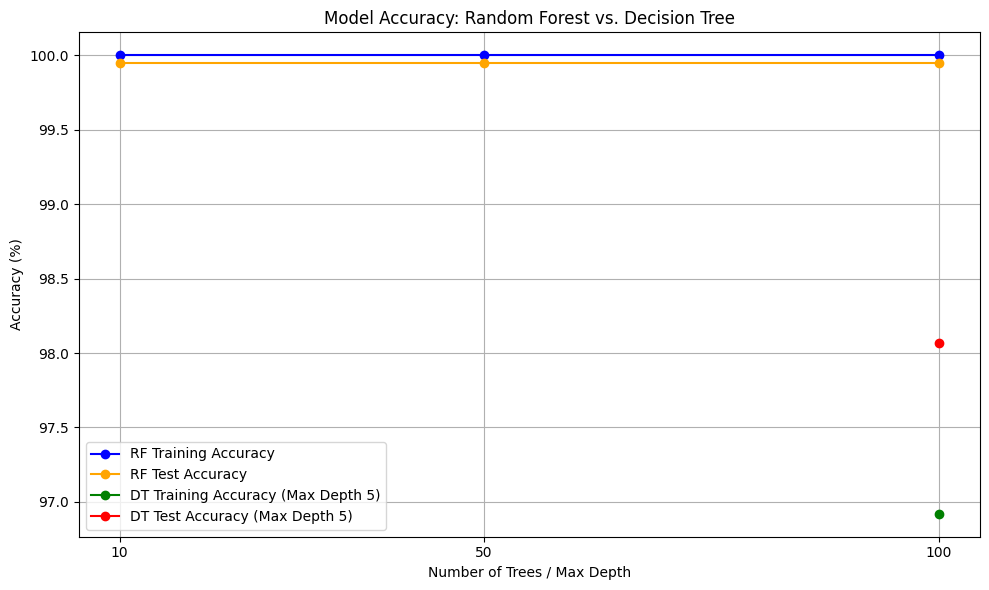

In [6]:
import matplotlib.pyplot as plt

# Data for Random Forest and Decision Tree models
trees = [10, 50, 100]
rf_train_acc = [100.00, 100.00, 100.00]
rf_test_acc = [99.95, 99.95, 99.95]

dt_max_depth = [5]
dt_train_acc = [96.92]
dt_test_acc = [98.07]

# Create a line graph
plt.figure(figsize=(10, 6))

# Plot Random Forest accuracy vs. number of trees
plt.plot(trees, rf_train_acc, label='RF Training Accuracy', marker='o', color='blue')
plt.plot(trees, rf_test_acc, label='RF Test Accuracy', marker='o', color='orange')

# Plot Decision Tree accuracy vs. max depth
plt.plot([100], dt_train_acc, label='DT Training Accuracy (Max Depth 5)', marker='o', color='green')
plt.plot([100], dt_test_acc, label='DT Test Accuracy (Max Depth 5)', marker='o', color='red')

# Add labels and title
plt.xlabel('Number of Trees / Max Depth')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy: Random Forest vs. Decision Tree')
plt.xticks([10, 50, 100])
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Measure time for Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_training_time = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(X_test)
rf_prediction_time = time.time() - start_time

# Measure time for Decision Tree
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
dt_training_time = time.time() - start_time

start_time = time.time()
dt_predictions = dt_model.predict(X_test)
dt_prediction_time = time.time() - start_time

# Evaluation for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluation for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Print time complexity results
print(f"Random Forest Training Time: {rf_training_time:.4f} seconds")
print(f"Random Forest Prediction Time: {rf_prediction_time:.4f} seconds")
print(f"Decision Tree Training Time: {dt_training_time:.4f} seconds")
print(f"Decision Tree Prediction Time: {dt_prediction_time:.4f} seconds")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.74      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.87      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Training Time: 915.4040 seconds
Random Forest Prediction Time: 0.8613 seconds
Decision Tree Training Time: 117.1314 seconds
Decision Tree Prediction Time: 0.0194 seconds
